In [3]:
import sys
sys.path.append('../Base/')

from imports import *
from sequential_models import FCQ, Cnn_model
from training_startegy import EGreedyExpStrategy, GreedyStrategy
from env import get_make_env_fn

from Base import ReplayBuffer,create_res_dir
from dqn import DQN
from env_image import getImage
from conf import *

#vdisplay = Xvfb(width=1280, height=740, colordepth=16)
#vdisplay.start()

In [3]:
conf_json = json.dumps(conf, indent=6)
current_dir = pathlib.Path.cwd()
m_dir, cp_dir = create_res_dir(current_dir,conf_json, from_pixel)

In [4]:
dqn_results = []
log.info(environment_settings)
for seed in SEEDS:

    #Neural Net
    value_model_fn = lambda nS, nA: FCQ(nS, nA, hidden_dims = model_hidden_layers)
    if from_pixel:
        value_model_fn = lambda nS, nA: Cnn_model(nS, nA)

    #Optimizer
    value_optimizer_fn = lambda net, lr: optim.RMSprop(net.parameters(), lr=lr)

    #Training Strategy
    training_strategy_fn = lambda: EGreedyExpStrategy(init_epsilon=init_epsilon,  
                                                      min_epsilon=min_epsilon, 
                                                      decay_steps=decay_steps)
    #Testing Strategy
    evaluation_strategy_fn = lambda: GreedyStrategy()

    #Memory
    replay_buffer_fn = lambda: ReplayBuffer(max_size=max_size, batch_size=batch_size)
    
    #Environment
    env_name, gamma, max_minutes, \
    max_episodes, goal_mean_100_reward = environment_settings.values()

    #Agent with all above functions
    agent = DQN(replay_buffer_fn,
                value_model_fn,
                value_optimizer_fn,
                value_optimizer_lr,
                training_strategy_fn,
                evaluation_strategy_fn,
                n_warmup_batches,
                update_target_every_steps)

    make_env_fn, make_env_kargs = get_make_env_fn(env_name=env_name)

    #Taining the agent!!!
    result= agent.train(
        make_env_fn, make_env_kargs, seed, gamma, max_minutes, max_episodes, goal_mean_100_reward, from_pixel, get_image_fn = lambda env: getImage(env), cp_name = str(cp_dir))

    dqn_results.append(result)


In [5]:
result

{'time': array([0.12968326, 0.11503363, 0.09123397, 0.23117852]),
 'reward': array([19., 21., 14., 50.])}

In [13]:
np.save(str(m_dir.joinpath('my_file.npy')), result) 
read_dictionary = np.load(str(m_dir.joinpath('my_file.npy')),allow_pickle='TRUE')

NameError: name 'm_dir' is not defined

In [88]:
model_name = 'value_4'
res_dir = pathlib.Path.cwd().joinpath('results')
model_dir = res_dir.joinpath(model_name)
model_stats = np.load(str(model_dir.joinpath('my_file.npy')), allow_pickle = True).item()

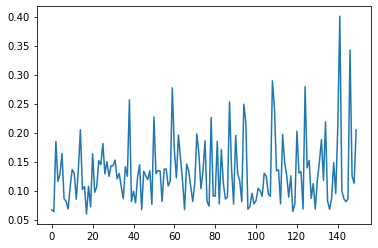

In [89]:
plt.plot(model_stats['time'])

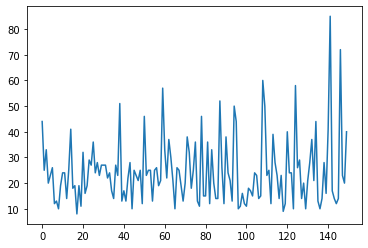

In [90]:
plt.plot(model_stats['reward'])

<BarContainer object of 2 artists>

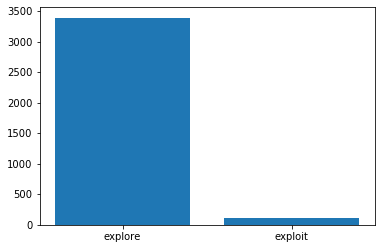

In [91]:
plt.bar(list(model_stats['training_actions'].keys()),list(model_stats['training_actions'].values()))

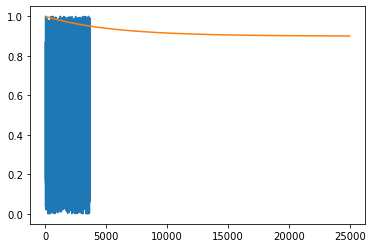

In [92]:
plt.plot(model_stats['rand_values'])
plt.plot(model_stats['epsilons'])

In [99]:
model_stats['total_time_steps']

3653

In [94]:
sum(list(model_stats['training_actions'].values()))

3503